# Explore here

In [1]:
import requests
import pandas as pd

# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type"


# Parámetros de la solicitud
parametros_fed = {
    "series_id":"CPIAUCSL",
    "api_key":"16dbd1bdceb90ffd932425b7e5c279fd",  
    "file_type":"json" 
}

def api_fed(url, parametros, realtime_start, realtime_end):

# Añadir fechas de busqueda 
    parametros["realtime_start"] = realtime_start
    parametros["realtime_end"] = realtime_end


# Realizar la solicitud GET
    response = requests.get(url, params=parametros)

# Verificar si la solicitud fue exitosa
    if response.status_code == 200:
    # Convertir la respuesta a formato JSON
        data = response.json()
    # Retorna la data 
        return data
    else:
        print(f"Error en la solicitud: {response.status_code}")


data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_CPIAUCSL = pd.DataFrame(data)

data_CPIAUCSL.head(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1173,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1173,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [2]:
data_CPIAUCSL.columns

Index(['realtime_start', 'realtime_end', 'observation_start',
       'observation_end', 'units', 'output_type', 'file_type', 'order_by',
       'sort_order', 'count', 'offset', 'limit', 'observations'],
      dtype='object')

In [3]:
def obtener_observation_fed(data_CPIAUCSL):
    # Convertir la columna "observations" que contiene JSON en un DataFrame
    observations_data = pd.json_normalize(data_CPIAUCSL["observations"])
    
    # Concatenar el DataFrame original con el nuevo DataFrame de las observaciones
    data_CPIAUCSL = pd.concat([data_CPIAUCSL.drop(columns=["observations"]), observations_data], axis=1)

    return data_CPIAUCSL

# Ejecutar la función para obtener los datos procesados
data_CPIAUCSL = obtener_observation_fed(data_CPIAUCSL)

def guardar_csv(data , url_archivo):
    data.to_csv(url_archivo, index= True)

guardar_csv(data_CPIAUCSL , "../data/raw/fed_CPIAUCSL_historical_data.csv")

In [4]:
data_CPIAUCSL.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
1171,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1173,0,100000,2024-09-11,2024-11-08,2024-08-01,314.121
1172,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1173,0,100000,2024-10-10,2024-11-08,2024-09-01,314.686


In [5]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type"


# Parámetros de la solicitud
parametros_fed = {
    "series_id": "GNP",
    "api_key": "b55d1a0787bb20a7fcc6aef921343008",  
    "file_type": "json" 
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_GNP = pd.DataFrame(data)

data_GNP.head(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,538,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,538,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [6]:
# Ejecutar la función para obtener los datos procesados
data_GNP = obtener_observation_fed(data_GNP)
#data_GNPCA.head(2)
guardar_csv(data_GNP,"../data/raw/fed_GNP_historical_data.csv")

In [7]:
data_GNP.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
536,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,538,0,100000,2024-08-29,2024-09-25,2024-04-01,28779.676
537,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,538,0,100000,2024-09-26,2024-11-08,2024-04-01,29076.614


In [8]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id"


# Parámetros de la solicitud
parametros_fed = {
    "api_key": "8660234b709531d44271bbd9520353dd",  
    "file_type": "json",
    "series_id": "UNRATE"
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_UNRATE = pd.DataFrame(data)

data_UNRATE.head(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,974,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,974,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [9]:
# Ejecutar la función para obtener los datos procesados
data_UNRATE = obtener_observation_fed(data_UNRATE)
guardar_csv(data_UNRATE,"../data/raw/fed_UNRATE_historical_data.csv")

In [10]:
data_UNRATE.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
972,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,974,0,100000,2024-10-04,2024-11-08,2024-09-01,4.1
973,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,974,0,100000,2024-11-01,2024-11-08,2024-10-01,4.1


In [11]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id"


# Parámetros de la solicitud
parametros_fed = {
    "api_key": "78f1d1b71351546a936232d4d5469d80",  
    "file_type": "json",
    "series_id": "DFF"
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_DFF= pd.DataFrame(data)

data_DFF.head(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25698,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25698,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [12]:
# Ejecutar la función para obtener los datos procesados
data_DFF = obtener_observation_fed(data_DFF)
guardar_csv(data_DFF,"../data/raw/fed_DFF_historical_data.csv")

In [13]:
data_DFF.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
25696,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25698,0,100000,2024-11-07,2024-11-08,2024-11-06,4.83
25697,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25698,0,100000,2024-11-08,2024-11-08,2024-11-07,4.83


In [14]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id"


# Parámetros de la solicitud
parametros_fed = {
    "api_key": "58f82a464f9ab2bc239793f7ebb937f7",  
    "file_type": "json",
    "series_id": "BOPGSTB"
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_BOPGSTB= pd.DataFrame(data)

data_BOPGSTB.head(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [15]:
# Ejecutar la función para obtener los datos procesados
data_BOPGSTB = obtener_observation_fed(data_BOPGSTB)
guardar_csv(data_BOPGSTB,"../data/raw/fed_BOPGSTB_historical_data.csv")

In [16]:
data_BOPGSTB.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
876,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,2024-11-05,2024-11-08,2024-08-01,-70787.0
877,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,2024-11-05,2024-11-08,2024-09-01,-84359.0


Realizar transformaciones en la data para poder utilizarla en el modelo

In [17]:
df_CPIAUCSL = data_CPIAUCSL[['date','value']].copy()
df_CPIAUCSL['date'] = pd.to_datetime(df_CPIAUCSL['date'])
df_CPIAUCSL['value'] = pd.to_numeric(df_CPIAUCSL['value'], errors='coerce')
df_CPIAUCSL['value'] = df_CPIAUCSL['value'].apply(lambda x: x*1000 if x < 500 else x)
df_CPIAUCSL['IPC_value'] = df_CPIAUCSL['value']
df_CPIAUCSL = df_CPIAUCSL.drop('value', axis=1)
df_CPIAUCSL = df_CPIAUCSL.drop_duplicates(subset=['date'], keep='last')
df_CPIAUCSL.set_index('date', inplace=True)

# Cambiar la frecuencia a diaria y rellenar con NaN
df_IPC_D = df_CPIAUCSL.resample('D').asfreq()

# Función personalizada para interpolar el valor y calcular variación diaria
def interpolar_valor(df_CPIAUCSL):
    # Interpolar valores entre meses
    df_interpolado = df_CPIAUCSL.resample('D').interpolate(method='linear')
    
    # Calcular la variación diaria como porcentaje
    df_interpolado['IPC_var'] = df_interpolado['IPC_value'].pct_change().round(5) * 100
    
    return df_interpolado

# Aplicar la función a los datos diarios
df_IPC_D = interpolar_valor(df_CPIAUCSL)

#df_IPC_D = df_IPC_D[(df_IPC_D['date'] >= '2021-01-01') & (df_IPC_D['date'] <= '2023-12-31')]
df_IPC_D

,IPC_value,IPC_var
date,,
1947-01-01,21480.000000,NaN
1947-01-02,21484.516129,0.021
1947-01-03,21489.032258,0.021
1947-01-04,21493.548387,0.021
1947-01-05,21498.064516,0.021
...,...,...
2024-08-28,314613.096774,0.006
2024-08-29,314631.322581,0.006
2024-08-30,314649.548387,0.006


In [18]:
df_BOPGSTBL = data_BOPGSTB[['date','value']].copy()
df_BOPGSTBL['date'] = pd.to_datetime(df_BOPGSTBL['date'])
df_BOPGSTBL['value'] = pd.to_numeric(df_BOPGSTBL['value'], errors='coerce')
df_BOPGSTBL['BC_value'] = df_BOPGSTBL['value'].apply(lambda x: x/100000000000 if x < -200000 else x)
df_BOPGSTBL = df_BOPGSTBL.drop('value', axis=1)
df_BOPGSTBL = df_BOPGSTBL.drop_duplicates(subset=['date'], keep='last')
df_BOPGSTBL.set_index('date', inplace=True)

df_BC_D = df_BOPGSTBL.resample('D').asfreq()
df_BC_D = df_BC_D.resample('D').interpolate(method='linear')
df_BC_D['BC_var'] = df_BC_D['BC_value'].pct_change().round(5) * 100
 
df_BC_D

,BC_value,BC_var
date,,
1992-01-01,-2026.000000,NaN
1992-01-02,-1987.451613,-1.903
1992-01-03,-1948.903226,-1.940
1992-01-04,-1910.354839,-1.978
1992-01-05,-1871.806452,-2.018
...,...,...
2024-08-28,-82607.774194,0.533
2024-08-29,-83045.580645,0.530
2024-08-30,-83483.387097,0.527


In [19]:
df_DFF = data_DFF[['date','value']].copy()

df_DFF['date'] = pd.to_datetime(df_DFF['date'])
df_DFF['value'] = pd.to_numeric(df_DFF['value'], errors='coerce')
df_DFF['TPM_value'] = df_DFF['value']
df_DFF['TPM_var'] = df_DFF['value'].pct_change().round(5) * 100
df_DFF = df_DFF.drop('value', axis=1)
df_DFF = df_DFF.drop_duplicates(subset=['date'], keep='last')
df_DFF.set_index('date', inplace=True)

df_DFF

,TPM_value,TPM_var
date,,
1954-07-01,1.13,NaN
1954-07-02,1.25,10.619
1954-07-03,1.25,0.000
1954-07-04,1.25,0.000
1954-07-05,0.88,-29.600
...,...,...
2024-11-03,4.83,0.000
2024-11-04,4.83,0.000
2024-11-05,4.83,0.000


In [20]:
df_GNP = data_GNP[['date','value']].copy()
df_GNP['date'] = pd.to_datetime(df_GNP['date'])
df_GNP['value'] = pd.to_numeric(df_GNP['value'], errors='coerce')
df_GNP['PIB_value'] = df_GNP['value'].apply(lambda x: x*1000 if x < 30000 else x)
df_GNP = df_GNP.drop('value', axis=1)
df_GNP = df_GNP.drop_duplicates(subset=['date'], keep='last')
df_GNP.set_index('date', inplace=True)

df_PIB_D = df_GNP.resample('D').asfreq()
df_PIB_D = df_PIB_D.resample('D').interpolate(method='linear')
df_PIB_D['PIB_var'] = df_PIB_D['PIB_value'].pct_change().round(5) * 100

df_PIB_D

,PIB_value,PIB_var
date,,
1939-01-01,NaN,NaN
1939-01-02,NaN,NaN
1939-01-03,NaN,NaN
1939-01-04,NaN,NaN
1939-01-05,NaN,NaN
...,...,...
2024-03-28,2.906033e+07,0.014
2024-03-29,2.906440e+07,0.014
2024-03-30,2.906847e+07,0.014


In [21]:
df_UNRATE = data_UNRATE[['date','value']].copy()
df_UNRATE['date'] = pd.to_datetime(df_UNRATE['date'])
df_UNRATE['value'] = pd.to_numeric(df_UNRATE['value'], errors='coerce')
df_UNRATE['TDES_value'] = df_UNRATE['value']
df_UNRATE = df_UNRATE.drop('value', axis=1)
df_UNRATE = df_UNRATE.drop_duplicates(subset=['date'], keep='last')
df_UNRATE.set_index('date', inplace=True)
df_TDES_D = df_UNRATE.resample('D').asfreq()
df_TDES_D = df_TDES_D.resample('D').interpolate(method='linear')
df_TDES_D['TDES_var'] = df_TDES_D['TDES_value'].pct_change().round(5) * 100

df_TDES_D

,TDES_value,TDES_var
date,,
1948-01-01,3.400000,NaN
1948-01-02,3.412903,0.380
1948-01-03,3.425806,0.378
1948-01-04,3.438710,0.377
1948-01-05,3.451613,0.375
...,...,...
2024-09-27,4.100000,0.000
2024-09-28,4.100000,0.000
2024-09-29,4.100000,0.000


In [22]:
#guardar los dataframe en formato csv
guardar_csv(df_BC_D,"../data/processed/df_balanzacomercial_diario.csv")
guardar_csv(df_IPC_D,"../data/processed/df_indicepreciosconsumidor_diario.csv")
guardar_csv(df_DFF,"../data/processed/df_tasainteres_diario.csv")
guardar_csv(df_PIB_D,"../data/processed/df_productointernobruto_diario.csv")
guardar_csv(df_TDES_D,"../data/processed/df_tasadesempleo_diario.csv")

Obtención de información para el valor del VIT index

In [23]:
import requests
import csv
import json
from datetime import datetime, timedelta

# API Key de Polygon.io
key_activos = '2T0PMe4qTXopT2r7lymhHfrBvMNhx6VI'

# Símbolos de los activos
activos = {      
    'VTI': 'VTI',          
    'Oro': 'C:XAUUSD',       
    'Bitcoin': 'X:BTCUSD'    
}

# Función para consultar datos históricos de un activo
def api_activos(key_activos, activo, timespan='day', start_date=None, end_date=None):
    # URL de la API para obtener los datos históricos
    url = f'https://api.polygon.io/v2/aggs/ticker/{activo}/range/1/{timespan}/{start_date}/{end_date}?adjusted=true&sort=asc&apiKey={key_activos}'
    
    # Hacer la solicitud GET a la API de Polygon.io
    response = requests.get(url)
    print(url)

    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        # Convertir la respuesta a formato JSON
        data = response.json()
        print ("bien")

        if 'results' in data:
            return data['results']  # Devolver solo los resultados
        else:
            print("No se encontraron resultados en la respuesta.")
            return []
    else:
        print(f"Error en la solicitud: {response.status_code}")
        return []


# Llamar a la función para cada activo y guardar los datos en archivos CSV separados

# Obtener y guardar datos del VTI
historical_data_vti = api_activos(key_activos, activos['VTI'], 'day', "2021-01-01", "2024-11-08")
vti = pd.DataFrame(historical_data_vti)
guardar_csv(vti, '../data/VTI_historical_data.csv')

https://api.polygon.io/v2/aggs/ticker/VTI/range/1/day/2021-01-01/2024-11-08?adjusted=true&sort=asc&apiKey=2T0PMe4qTXopT2r7lymhHfrBvMNhx6VI
bien


In [24]:
# convertir a fecha 

vti['t'] = pd.to_datetime(vti['t'], unit='ms').dt.strftime('%Y-%m-%d')
vti.tail()

,v,vw,o,c,h,l,t,n
489,2383851.0,282.1086,282.17,281.72,283.07,280.8650,2024-11-04,68707
490,2056304.0,284.1608,282.11,285.30,285.30,282.0100,2024-11-05,46980
491,5668856.0,292.1445,292.30,293.28,293.61,290.2100,2024-11-06,90681
492,4095995.0,294.9238,294.02,295.33,295.90,294.0100,2024-11-07,75094
493,4142370.0,296.6265,295.61,296.71,297.37,295.5137,2024-11-08,66491


In [25]:
vti.drop(['v', 'vw', 'o', 'h', 'l', 'n'], axis = 1, inplace = True)


In [26]:
vti.tail()

,c,t
489,281.72,2024-11-04
490,285.30,2024-11-05
491,293.28,2024-11-06
492,295.33,2024-11-07
493,296.71,2024-11-08


In [27]:
vti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c       494 non-null    float64
 1   t       494 non-null    object 
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [28]:
vti['t'] = pd.to_datetime(vti['t'])

In [29]:
vti = vti.rename(columns = {'c' : 'VTI_value'})
vti = vti.rename(columns = {'t' : 'date'})
vti = vti.set_index("date")

In [30]:
vti

,VTI_value
date,
2022-11-22,200.17
2022-11-23,201.39
2022-11-25,201.54
2022-11-28,198.27
2022-11-29,197.96
...,...
2024-11-04,281.72
2024-11-05,285.30
2024-11-06,293.28


In [31]:
vti.index

DatetimeIndex(['2022-11-22', '2022-11-23', '2022-11-25', '2022-11-28',
               '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02',
               '2022-12-05', '2022-12-06',
               ...
               '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
               '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06',
               '2024-11-07', '2024-11-08'],
              dtype='datetime64[ns]', name='date', length=494, freq=None)

In [32]:
# Crear un rango de fechas para el índice
fecha_inicio = '2022-12-01'
fecha_fin = '2024-11-08'

rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='D')


# Crear el DataFrame base con el índice de fechas

df_indicadores_D = pd.DataFrame(index=rango_fechas)

# Llenar el DataFrame base con datos de otros DataFrames
df_indicadores_D = df_indicadores_D.join(vti, how = 'left')
df_indicadores_D = df_indicadores_D.join(df_DFF, how='left')
df_indicadores_D = df_indicadores_D.join(df_TDES_D, how='left')
df_indicadores_D = df_indicadores_D.join(df_IPC_D, how='left')
df_indicadores_D = df_indicadores_D.join(df_PIB_D, how='left')
df_indicadores_D = df_indicadores_D.join(df_BC_D, how='left')

df_indicadores_D.ffill(inplace=True)


df_indicadores_D

,VTI_value,TPM_value,TPM_var,TDES_value,TDES_var,IPC_value,IPC_var,PIB_value,PIB_var,BC_value,BC_var
2022-12-01,204.18,3.83,0.0,3.500000,-0.095,298812.000000,0.002,2.713360e+07,0.016,-70762.000000,0.388
2022-12-02,203.99,3.83,0.0,3.496774,-0.092,298861.806452,0.017,2.713782e+07,0.016,-70736.129032,-0.037
2022-12-03,203.99,3.83,0.0,3.493548,-0.092,298911.612903,0.017,2.714204e+07,0.016,-70710.258065,-0.037
2022-12-04,203.99,3.83,0.0,3.490323,-0.092,298961.419355,0.017,2.714626e+07,0.016,-70684.387097,-0.037
2022-12-05,199.98,3.83,0.0,3.487097,-0.092,299011.225806,0.017,2.715048e+07,0.016,-70658.516129,-0.037
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-04,281.72,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-05,285.30,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-06,293.28,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-07,295.33,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522


In [33]:
# Eliminar filas donde 'columna_objetivo' es NaN
df_indicadores_D = df_indicadores_D.dropna(subset=['VTI_value'])
# Reemplazar NaN con el valor anterior en cada columna

df_indicadores_D = df_indicadores_D.ffill()
df_indicadores_D = df_indicadores_D.reset_index()
df_indicadores_D.rename(columns={'index': 'date'}, inplace=True)

df_indicadores_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        709 non-null    datetime64[ns]
 1   VTI_value   709 non-null    float64       
 2   TPM_value   709 non-null    float64       
 3   TPM_var     709 non-null    float64       
 4   TDES_value  709 non-null    float64       
 5   TDES_var    709 non-null    float64       
 6   IPC_value   709 non-null    float64       
 7   IPC_var     709 non-null    float64       
 8   PIB_value   709 non-null    float64       
 9   PIB_var     709 non-null    float64       
 10  BC_value    709 non-null    float64       
 11  BC_var      709 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 66.6 KB


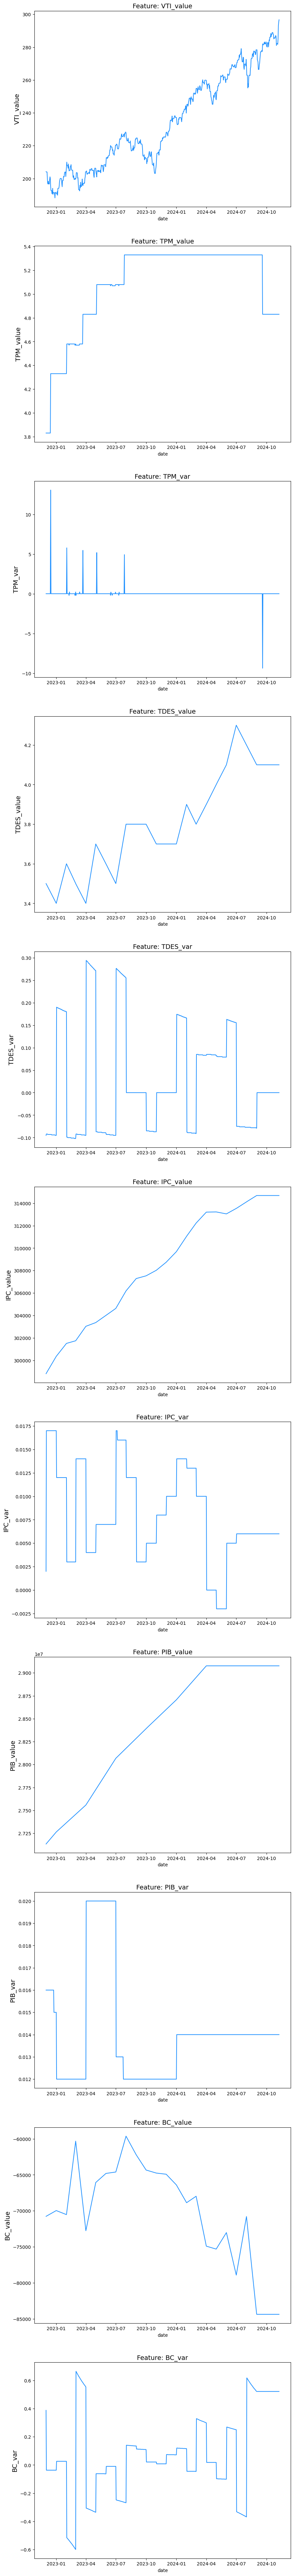

In [34]:
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

# To complete the data, as naive method, we will use .ffill()
f, ax = plt.subplots(nrows=11, ncols=1, figsize=(10, 100))

for i, column in enumerate(df_indicadores_D.drop('date', axis=1).columns):
    sns.lineplot(x=df_indicadores_D['date'], y=df_indicadores_D[column].ffill(), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    #ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])   

In [35]:
df_indicadores_D = df_indicadores_D.sort_values(by='date')

# Check time intervals
df_indicadores_D['delta'] = df_indicadores_D['date'] - df_indicadores_D['date'].shift(1)

df_indicadores_D[['date', 'delta']].head()

,date,delta
0,2022-12-01,NaT
1,2022-12-02,1 days
2,2022-12-03,1 days
3,2022-12-04,1 days
4,2022-12-05,1 days


In [36]:
df_indicadores_D['delta'].sum(), df_indicadores_D['delta'].count()

(Timedelta('708 days 00:00:00'), 708)

In [37]:
df_indicadores_D = df_indicadores_D.drop('delta', axis=1)
df_indicadores_D.isna().sum()

date          0
VTI_value     0
TPM_value     0
TPM_var       0
TDES_value    0
TDES_var      0
IPC_value     0
IPC_var       0
PIB_value     0
PIB_var       0
BC_value      0
BC_var        0
dtype: int64

In [38]:
df_indicadores_D.columns

Index(['date', 'VTI_value', 'TPM_value', 'TPM_var', 'TDES_value', 'TDES_var',
       'IPC_value', 'IPC_var', 'PIB_value', 'PIB_var', 'BC_value', 'BC_var'],
      dtype='object')

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns = ['VTI_value', 'TPM_value', 'TPM_var', 'TDES_value', 'TDES_var',
       'IPC_value', 'IPC_var', 'PIB_value', 'PIB_var', 'BC_value', 'BC_var']

for column in core_columns:
    decomp = seasonal_decompose(df_indicadores_D[column], period=52, model='additive', extrapolate_trend='freq')
    df_indicadores_D[f"{column}_trend"] = decomp.trend
    df_indicadores_D[f"{column}_seasonal"] = decomp.seasonal

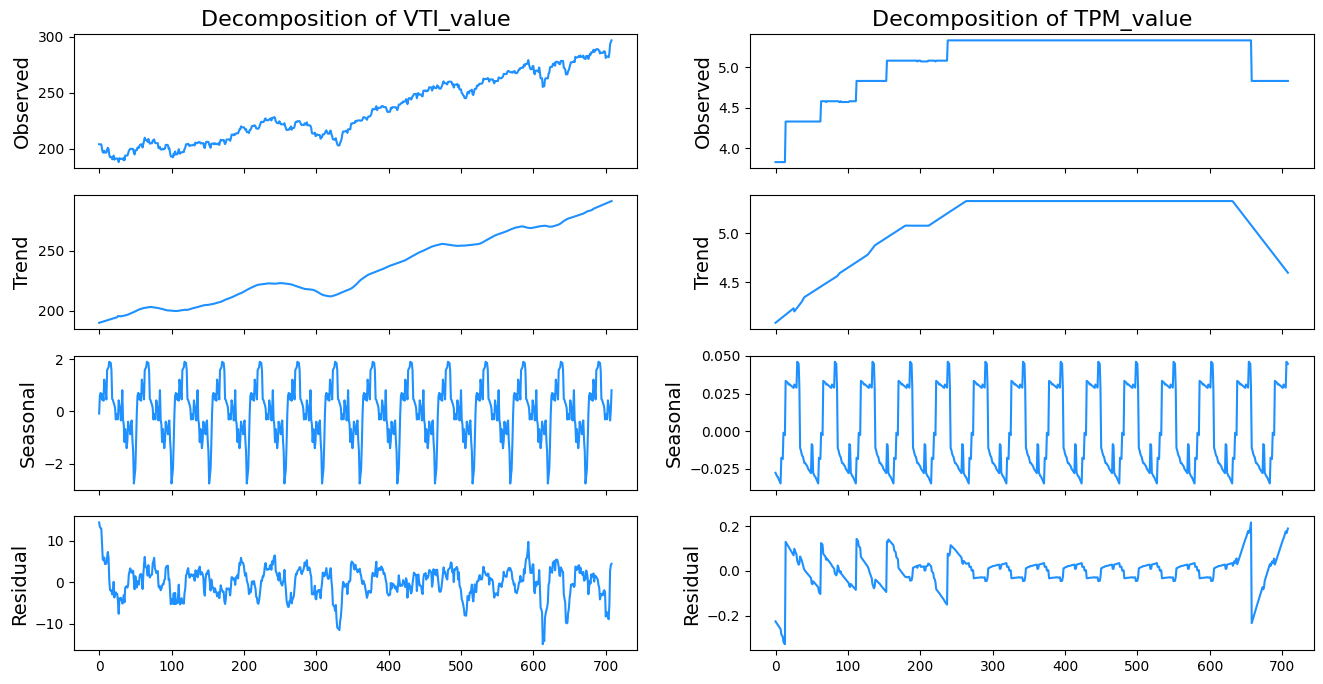

In [40]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['VTI_value', 'TPM_value']):
    
    res = seasonal_decompose(df_indicadores_D[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)


In [41]:
weeks_in_month = 4

for column in core_columns:
    df_indicadores_D[f'{column}_seasonal_shift_b_2m'] = df_indicadores_D[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df_indicadores_D[f'{column}_seasonal_shift_b_1m'] = df_indicadores_D[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df_indicadores_D[f'{column}_seasonal_shift_1m'] = df_indicadores_D[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df_indicadores_D[f'{column}_seasonal_shift_2m'] = df_indicadores_D[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df_indicadores_D[f'{column}_seasonal_shift_3m'] = df_indicadores_D[f'{column}_seasonal'].shift(3 * weeks_in_month)

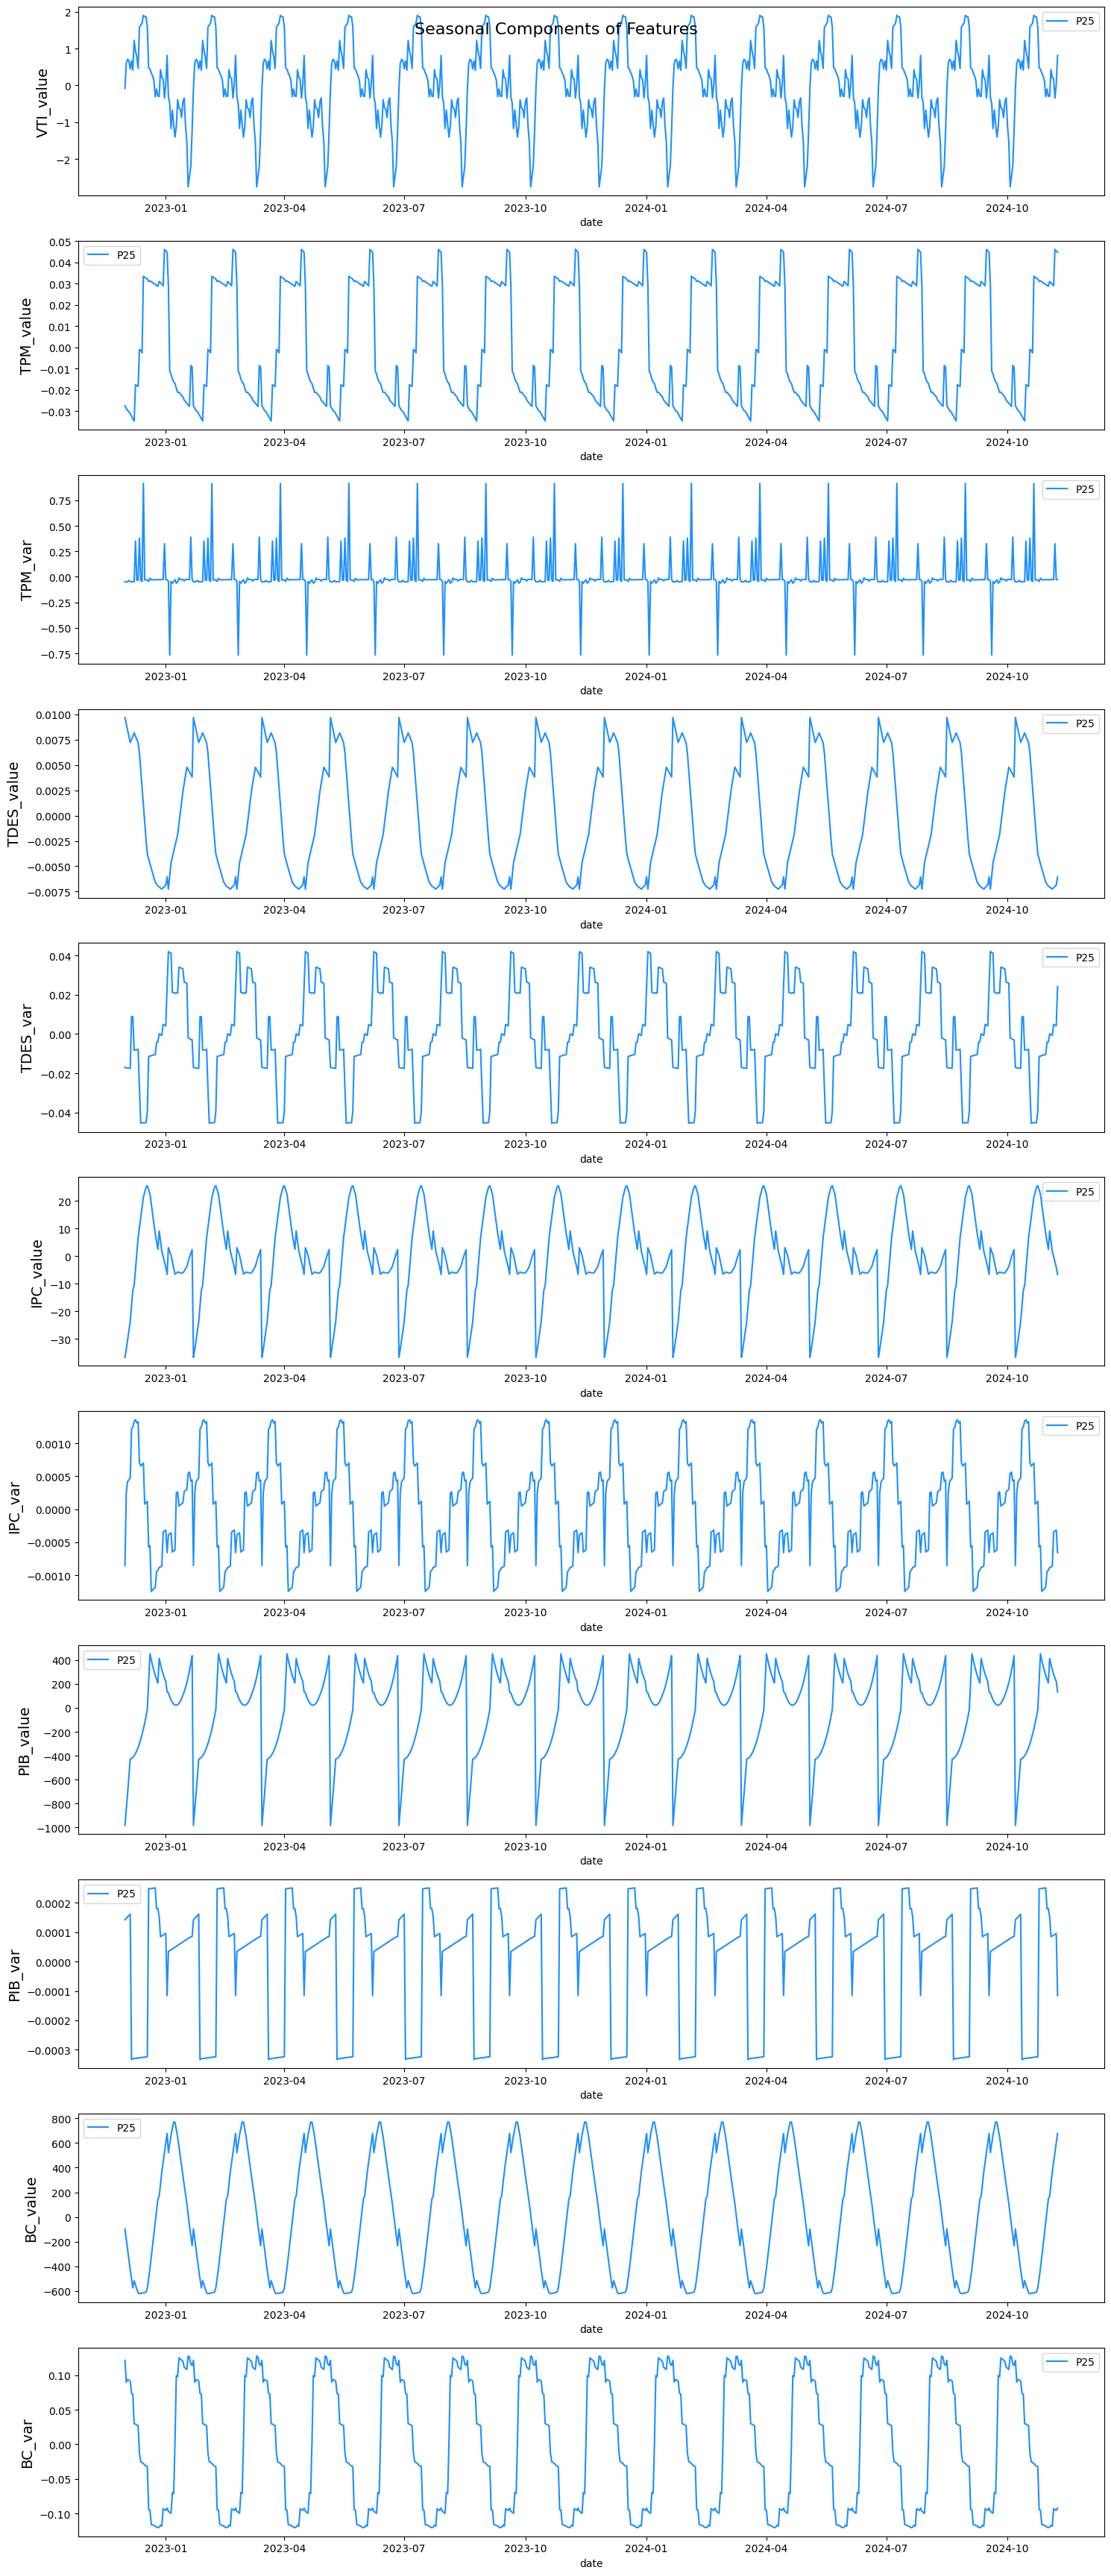

In [42]:
f, ax = plt.subplots(nrows=11, ncols=1, figsize=(15, 35))
f.suptitle('Seasonal Components of Features', fontsize=16)
core_columns = ['VTI_value', 'TPM_value', 'TPM_var', 'TDES_value', 'TDES_var',
       'IPC_value', 'IPC_var', 'PIB_value', 'PIB_var', 'BC_value', 'BC_var']
for i, column in enumerate(core_columns):
    sns.lineplot(x=df_indicadores_D['date'], y=df_indicadores_D[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    #ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

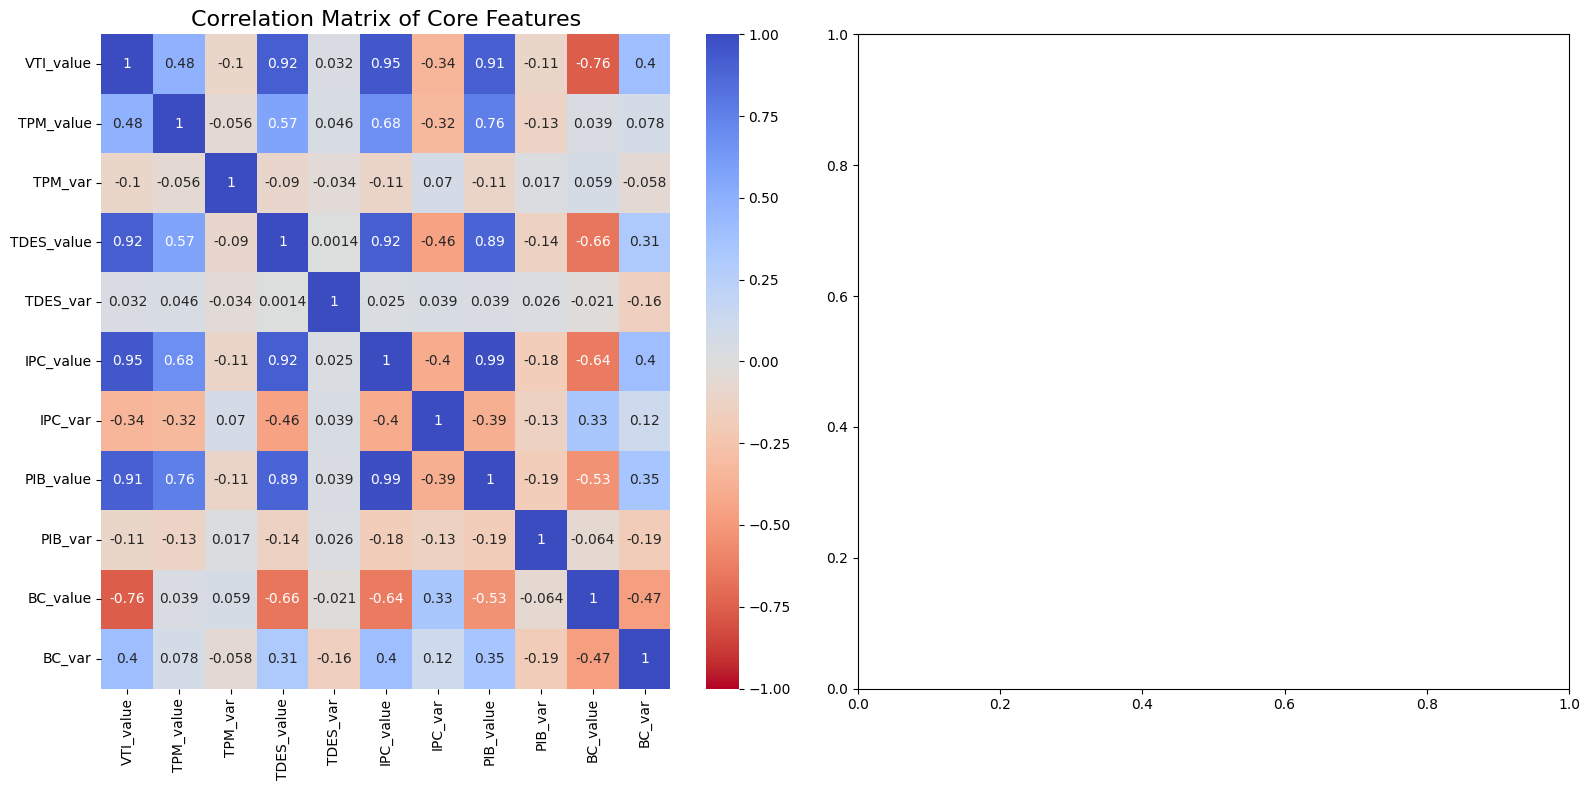

In [43]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = df_indicadores_D[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

#shifted_cols = [
#    'depth_to_groundwater_seasonal',         
#    'temperature_seasonal_shift_b_2m',
#    'drainage_volume_seasonal_shift_2m', 
#    'river_hydrometry_seasonal_shift_3m'
#]
#corrmat = df[shifted_cols].corr()

#sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
#ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

In [44]:
df_indicadores_D = df_indicadores_D.drop(['IPC_value','PIB_value','PIB_var','BC_value','TDES_value','TPM_value'],axis=1)

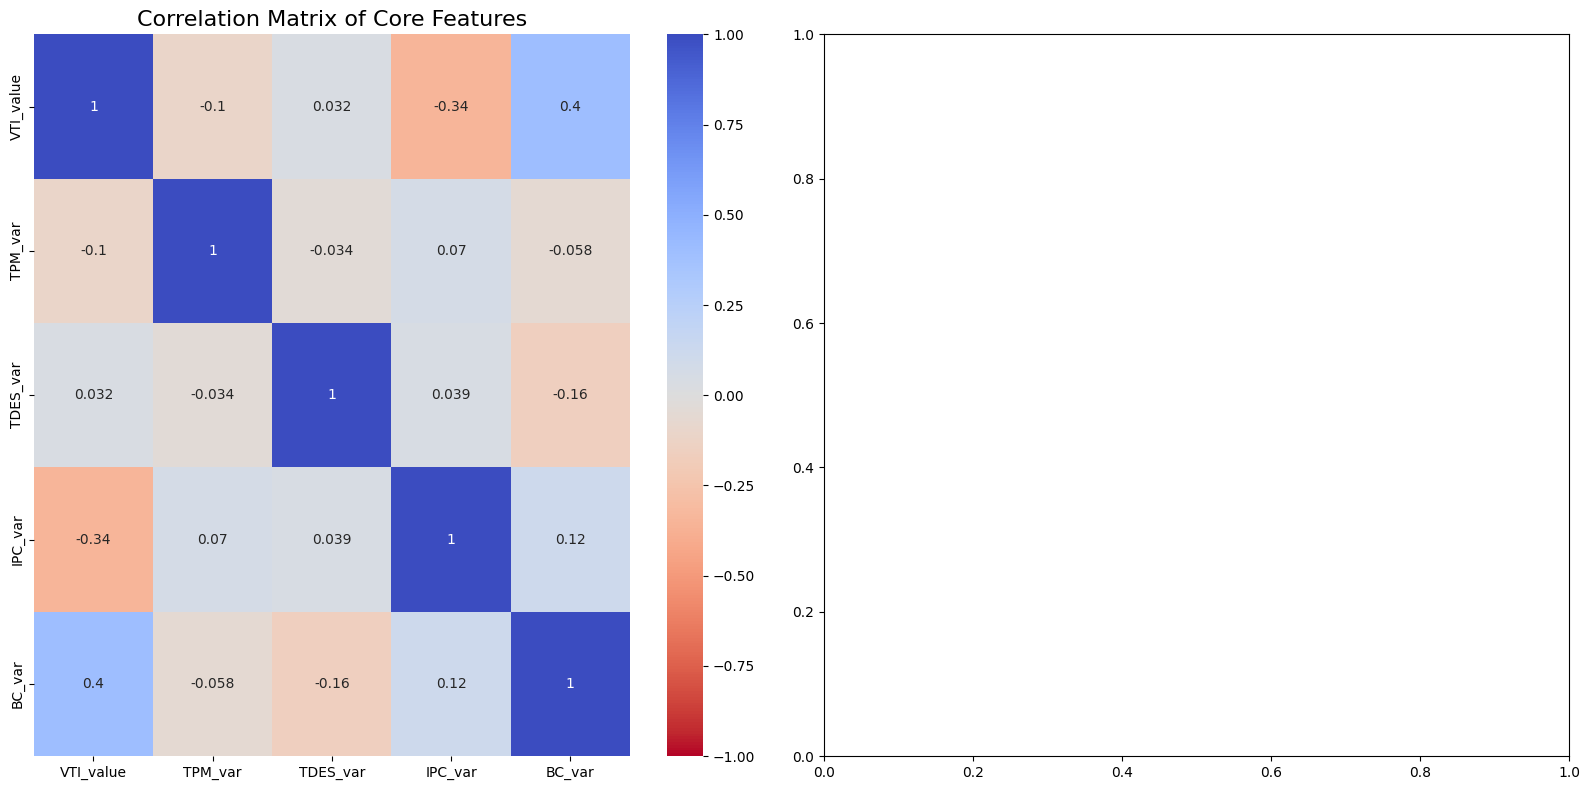

In [45]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

core_columns = ['VTI_value','TPM_var','TDES_var', 'IPC_var','BC_var']

corrmat2 = df_indicadores_D[core_columns].corr()

sns.heatmap(corrmat2, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

#shifted_cols = [
#    'depth_to_groundwater_seasonal',         
#    'temperature_seasonal_shift_b_2m',
#    'drainage_volume_seasonal_shift_2m', 
#    'river_hydrometry_seasonal_shift_3m'
#]
#corrmat = df[shifted_cols].corr()

#sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
#ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

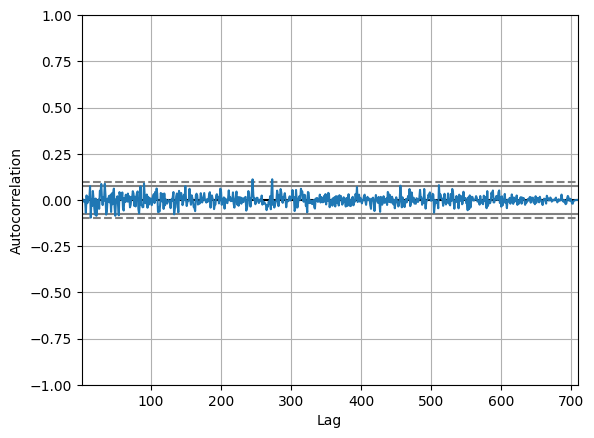

In [46]:
import numpy as np
from pandas.plotting import autocorrelation_plot
# First Order Differencing
ts_diff = np.diff(df_indicadores_D['VTI_value'])
df_indicadores_D['VTI_value_diff_1'] = np.append([0], ts_diff)
autocorrelation_plot(df_indicadores_D['VTI_value_diff_1'])
plt.show()

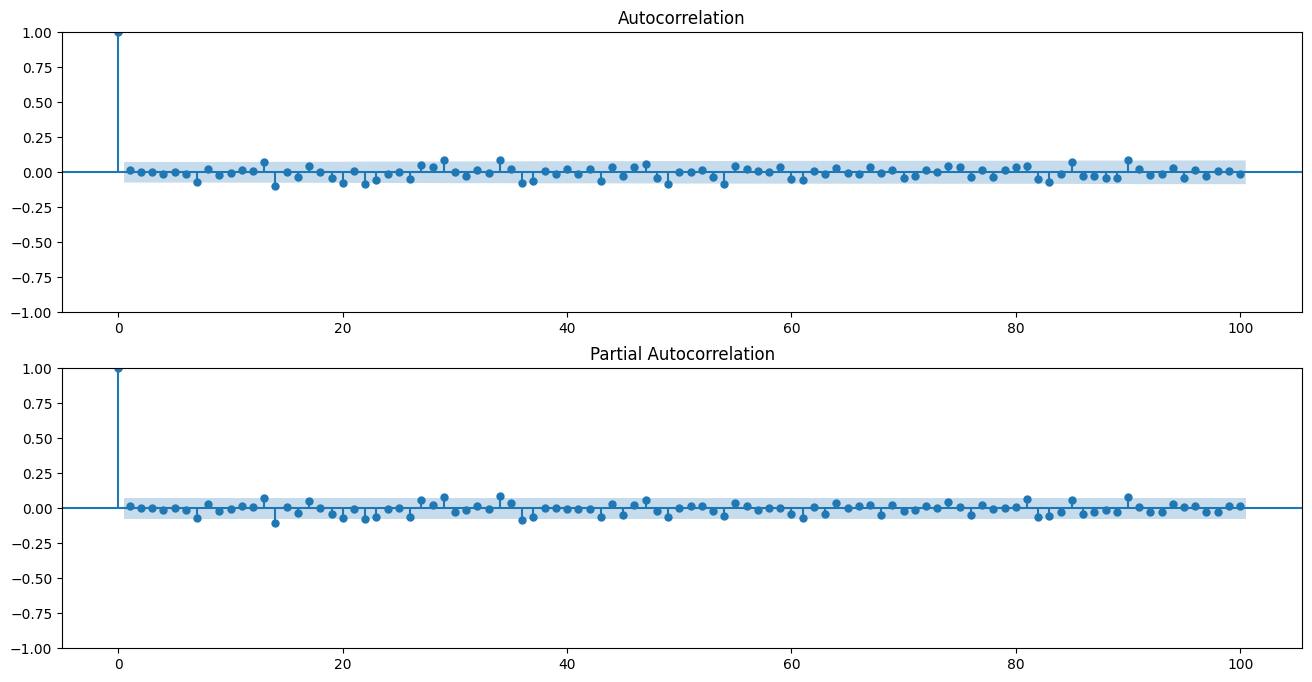

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df_indicadores_D['VTI_value_diff_1'], lags=100, ax=ax[0])
plot_pacf(df_indicadores_D['VTI_value_diff_1'], lags=100, ax=ax[1])

plt.show()

In [48]:
feature_columns = ['TPM_var','TDES_var', 'IPC_var','BC_var']

target_column = ['VTI_value']

train_size = int(0.85 * len(df_indicadores_D))

multivariate_df = df_indicadores_D[['date'] + target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.tail()

,ds,y,TPM_var,TDES_var,IPC_var,BC_var
597,2024-07-20,271.06,0.0,-0.076,0.006,-0.354
598,2024-07-21,271.06,0.0,-0.076,0.006,-0.355
599,2024-07-22,273.89,0.0,-0.076,0.006,-0.356
600,2024-07-23,273.69,0.0,-0.076,0.006,-0.357
601,2024-07-24,267.53,0.0,-0.076,0.006,-0.359


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from prophet import Prophet
from colorama import Fore

# Train the model
model = Prophet()
model.add_regressor('TPM_var')
model.add_regressor('TDES_var')
model.add_regressor('IPC_var')
model.add_regressor('BC_var')

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + 'MAE: {}'.format(score_mae))
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

12:00:46 - cmdstanpy - INFO - Chain [1] start processing
12:00:47 - cmdstanpy - INFO - Chain [1] done processing


MAE: 4.490735867326484
RMSE: 5.417103260009912


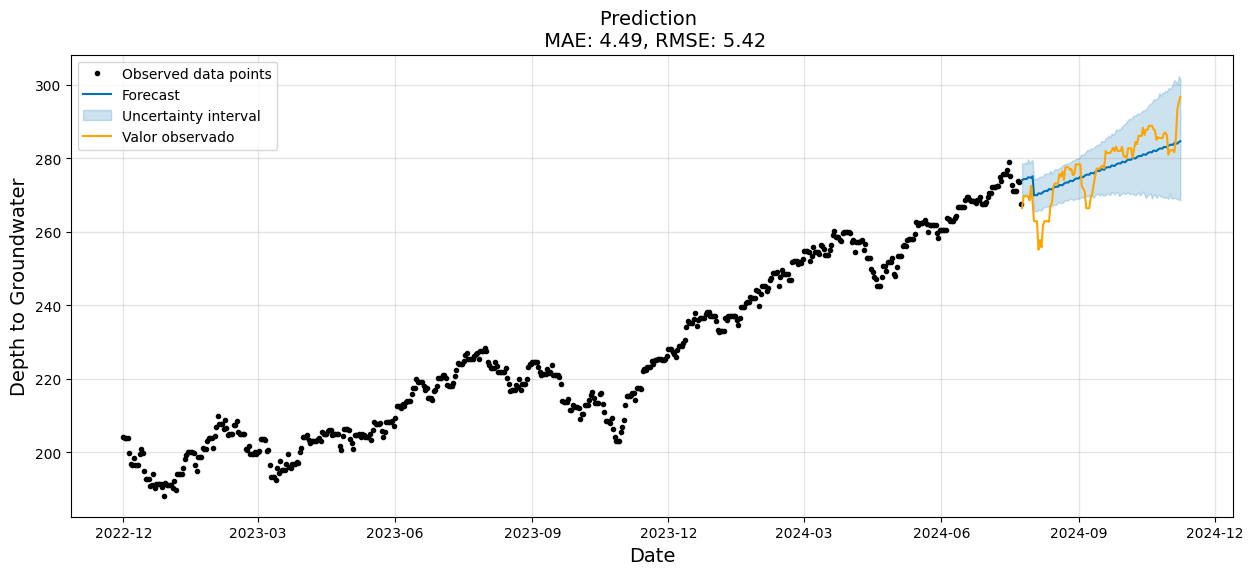

In [50]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Valor observado') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()


In [51]:
from neuralprophet import NeuralProphet

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from colorama import Fore

model_np = NeuralProphet()
model_np.add_lagged_regressor('TPM_var')
model_np.add_lagged_regressor('TDES_var')
model_np.add_lagged_regressor('IPC_var')
model_np.add_lagged_regressor('BC_var')




Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1


In [52]:
# Split Train and Test Data
df_train_np, df_test_np = model_np.split_df(multivariate_df, valid_p=0.05, local_split=True)
print(f"Train shape: {df_train_np.shape}")
print(f"Test shape: {df_test_np.shape}")



WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.859% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Train shape: (674, 6)
Test shape: (35, 6)


In [53]:
# Fit model
metrics_fit = model_np.fit(df_train_np, freq="D", metrics=True)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.852% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWa

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (22) is too small than the required number                     for the learning rate finder (222). The results might not be optimal.


Finding best initial lr:   0%|          | 0/222 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [00:00<?, ?it/s]

In [54]:
# Predict
#forecast = model_np.predict(multivariate_df)
forecast = model_np.predict(df_test_np)

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.143% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the d

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [55]:
multivariate_df = multivariate_df.drop(0)
forecast = forecast.drop(0)

In [56]:

# Calcuate metrics
score_mae_np = mean_absolute_error(multivariate_df['y'], forecast['yhat1'])
score_rmse_np = math.sqrt(mean_squared_error(multivariate_df['y'], forecast['yhat1']))

print(Fore.GREEN + 'MAE: {}'.format(score_mae_np))
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse_np))

ValueError: Found input variables with inconsistent numbers of samples: [708, 34]

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



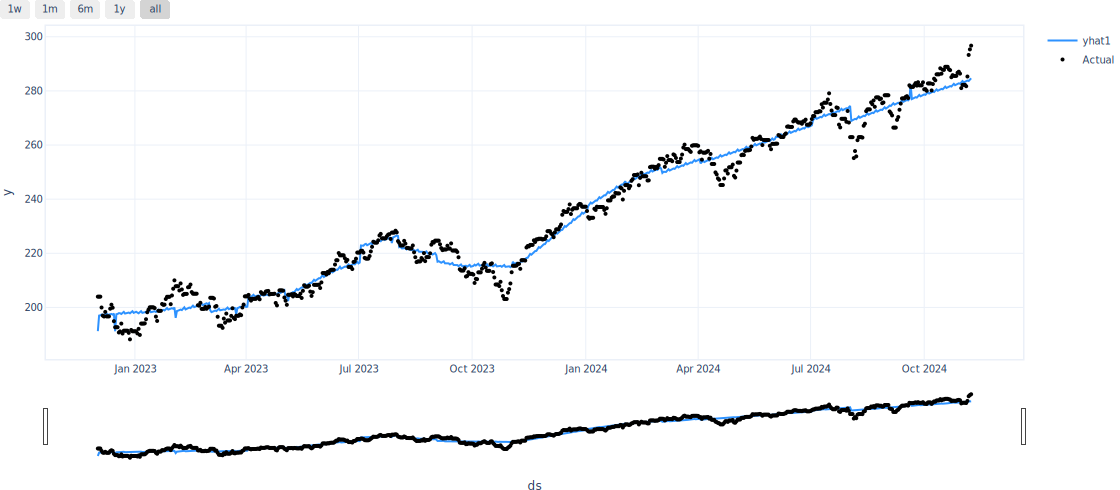

In [ ]:
model_np.set_plotting_backend('plotly-static')
model_np.plot(forecast, figsize=(16,7))

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




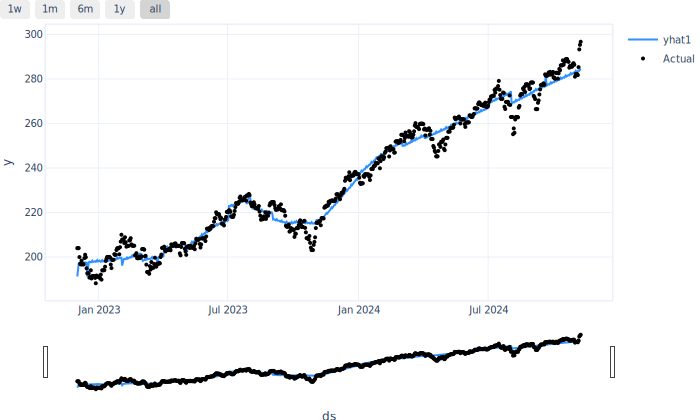

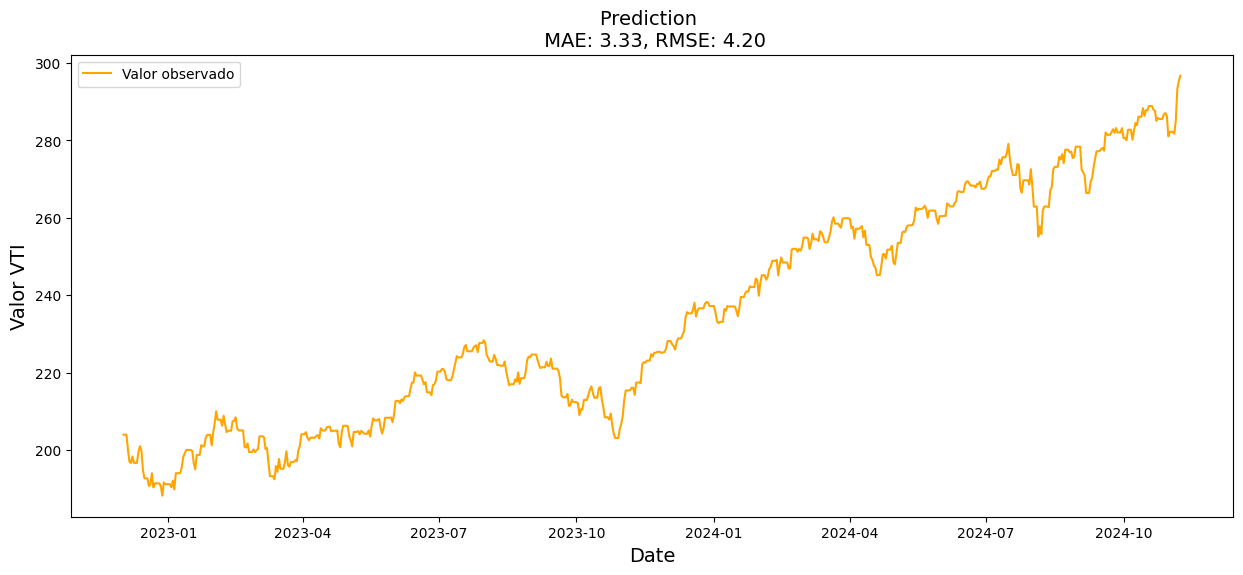

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_np.plot(forecast, ax=ax)
sns.lineplot(x=multivariate_df['ds'], y=multivariate_df['y'], ax=ax, color='orange', label='Valor observado') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae_np:.2f}, RMSE: {score_rmse_np:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Valor VTI', fontsize=14)

plt.show()



WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




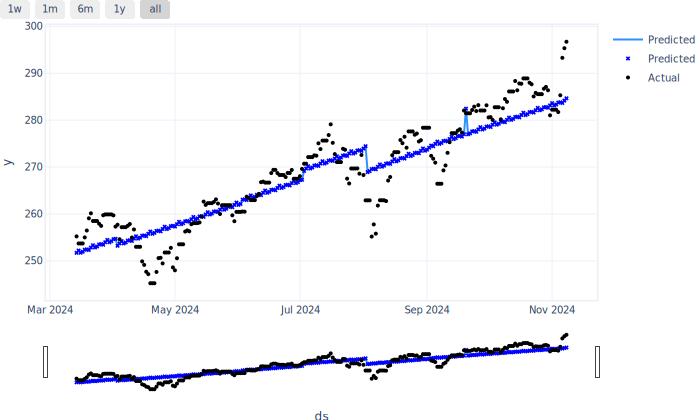

In [ ]:
model_np.highlight_nth_step_ahead_of_each_forecast(1).plot(forecast.iloc[-10 * 24 :])

In [ ]:
forecast

,ds,y,yhat1,lagged_regressor_TPM_var1,lagged_regressor_TDES_var1,lagged_regressor_IPC_var1,lagged_regressor_BC_var1,trend,season_weekly
1,2022-12-02,203.99,191.248795,-11.743386,4.555429,12.517757,-14.179125,199.671021,0.427096
2,2022-12-03,203.99,197.000092,-3.299552,1.279944,3.517128,-3.983924,199.707458,-0.220966
3,2022-12-04,203.99,197.099289,-3.299552,1.279944,3.517128,-3.983924,199.743896,-0.158198
4,2022-12-05,199.98,197.401642,-3.299552,1.279944,3.517128,-3.983924,199.780319,0.107717
5,2022-12-06,196.98,197.358124,-3.299552,1.279944,3.517128,-3.983924,199.816757,0.027761
...,...,...,...,...,...,...,...,...,...
704,2024-11-04,281.72,283.749634,-10.517777,4.079998,11.211332,-12.699309,291.567078,0.108309
705,2024-11-05,285.30,283.815399,-10.517777,4.079998,11.211332,-12.699309,291.713501,0.027656
706,2024-11-06,293.28,283.659546,-10.517777,4.079998,11.211332,-12.699309,291.859894,-0.274593
707,2024-11-07,295.33,284.171814,-10.517777,4.079998,11.211332,-12.699309,292.006287,0.091282


In [ ]:
y_pred


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,BC_var,BC_var_lower,BC_var_upper,IPC_var,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-07-25,272.578600,269.501213,278.677398,272.578600,272.578600,2.026047,2.026047,2.026047,-0.544452,...,1.481318,1.481318,1.481318,0.025849,0.025849,0.025849,0.0,0.0,0.0,274.085767
1,2024-07-26,272.723656,270.048389,278.327308,272.723656,272.723656,2.031585,2.031585,2.031585,-0.544452,...,1.486856,1.486856,1.486856,0.126627,0.126627,0.126627,0.0,0.0,0.0,274.337139
2,2024-07-27,272.868713,269.978896,278.491130,272.868713,272.868713,2.037123,2.037123,2.037123,-0.544452,...,1.492394,1.492394,1.492394,0.050790,0.050790,0.050790,0.0,0.0,0.0,274.411896
3,2024-07-28,273.013769,269.822021,278.564463,273.013769,273.013769,2.048198,2.048198,2.048198,-0.544452,...,1.503459,1.503459,1.503459,-0.144832,-0.144832,-0.144832,0.0,0.0,0.0,274.372396
4,2024-07-29,273.158825,270.371865,278.884725,273.158825,273.158825,2.053736,2.053736,2.053736,-0.544452,...,1.508997,1.508997,1.508997,0.182614,0.182614,0.182614,0.0,0.0,0.0,274.850436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2024-11-04,287.374338,268.072126,298.856422,272.214131,301.686860,-2.858300,-2.858300,-2.858300,-0.544452,...,-3.402273,-3.402273,-3.402273,0.182614,0.182614,0.182614,0.0,0.0,0.0,284.154679
103,2024-11-05,287.519394,267.516227,298.838071,272.130829,302.147523,-2.858300,-2.858300,-2.858300,-0.544452,...,-3.402273,-3.402273,-3.402273,-0.003820,-0.003820,-0.003820,0.0,0.0,0.0,284.113302
104,2024-11-06,287.664451,267.197108,299.442617,272.053952,302.416572,-2.858300,-2.858300,-2.858300,-0.544452,...,-3.402273,-3.402273,-3.402273,-0.237229,-0.237229,-0.237229,0.0,0.0,0.0,284.024949
105,2024-11-07,287.809507,267.063222,300.232467,271.848823,302.896384,-2.858300,-2.858300,-2.858300,-0.544452,...,-3.402273,-3.402273,-3.402273,0.025849,0.025849,0.025849,0.0,0.0,0.0,284.433083


In [ ]:
x_valid

,ds,TPM_var,TDES_var,IPC_var,BC_var
602,2024-07-25,0.0,-0.076,0.006,-0.360
603,2024-07-26,0.0,-0.076,0.006,-0.361
604,2024-07-27,0.0,-0.076,0.006,-0.362
605,2024-07-28,0.0,-0.077,0.006,-0.364
606,2024-07-29,0.0,-0.077,0.006,-0.365
...,...,...,...,...,...
704,2024-11-04,0.0,0.000,0.006,0.522
705,2024-11-05,0.0,0.000,0.006,0.522
706,2024-11-06,0.0,0.000,0.006,0.522
707,2024-11-07,0.0,0.000,0.006,0.522


In [ ]:
y_valid

,y
602,266.50
603,269.69
604,269.69
605,269.69
606,269.71
...,...
704,281.72
705,285.30
706,293.28
707,295.33


WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




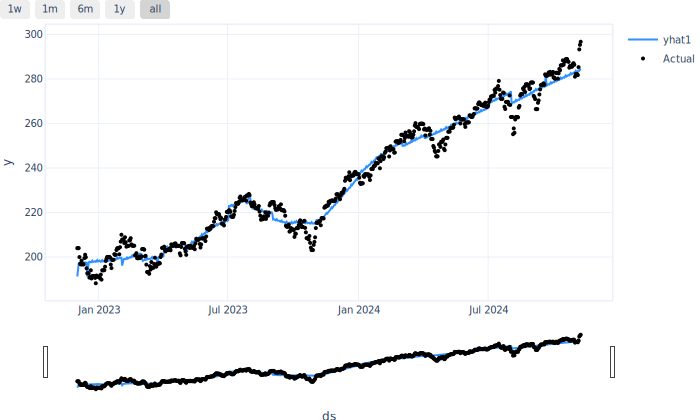

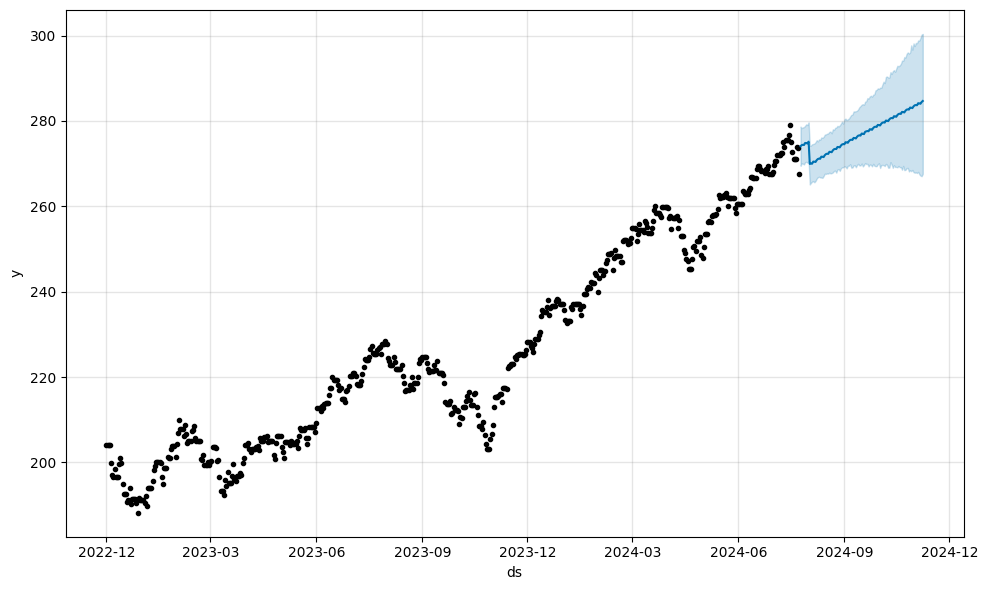

In [ ]:

model.plot(y_pred)
model_np.plot(forecast)